# LightGBM - Gradient Boosted Decision Trees

LightGBM is a framework that provides an implementation of gradient boosted decision trees. It's created by the researchers and developers team at Microsoft. Light GBM is known for its faster-training speed, good accuracy with default parameters, parallel, and GPU learning, low memory footprint, and capability of handling large dataset which might not fit in memory. LightGBM provides API in C, Python, and R Programming. LightGBM even provides CLI which lets us use the library from the command line. LightGBM estimators provide a large set of hyperparameters to tune the model. It even has a large set of optimization/loss functions and evaluation metrics already implemented. As a part of this tutorial, we'll be covering the Python API of lightgbm. We'll try to explain and cover the majority of the Python API of lightgbm. The main aim of this tutorial is to make readers aware of the majority of functionalities available through lightgbm and get them started with the framework. There are other libraries (xgboost, catboost, scikit-learn) that also provide an implementation of gradient boosted decision trees. Please feel free to check the references section to know about them.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 50)

import lightgbm as lgb
import sklearn

print("LightGBM Version     : ", lgb.__version__)
print("Scikit-Learn Version : ", sklearn.__version__)

LightGBM Version     :  3.2.0
Scikit-Learn Version :  0.24.1


## Load Datasets

- Boston Housing Dataset: It's a regression problem dataset which has information about the various attribute of houses in Boston and their price in dollar. This will be used for regression tasks.
- Breast Cancer Dataset: It's a classification dataset that has information about two different types of tumor. It'll be used for explaining binary classification tasks.
- Wine Dataset: It's a classification dataset that has information about ingredients used in three different types of wines. It'll be used for explaining multi-class classification tasks.

### Boston Housing Dataset

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:29]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Breast Cancer Dataset

In [5]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

for line in breast_cancer.DESCR.split("\n")[5:31]:
    print(line)

breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names) # features
breast_cancer_df["TumorType"] = breast_cancer.target # target

breast_cancer_df.head()

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
       

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TumorType
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Wine Dataset

In [6]:
from sklearn.datasets import load_wine

wine = load_wine()

for line in wine.DESCR.split("\n")[5:29]:
    print(line)

wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names) # features
wine_df["WineType"] = wine.target # target

wine_df.head()

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## train()

The simplest way to create an estimator in lightgbm is by using the train() method. It takes as input estimator parameter as dictionary and training dataset. It then trains the estimator and returns an object of type Booster which is a trained estimator that can be used to make future predictions.

Below are some of the important parameters of the train() method.

- params - This parameter accepts dictionary specifying parameters of gradient boosted decision trees algorithm. We just need to provide an objective function to get started with based on the type of problem (classification/regression). We'll later explain a commonly used list of parameters that can be passed to this dictionary.
- train_set - This parameter accepts lightgbm Dataset object which holds information about feature values and target values. It's an internal data structure designed by lightgbm to wrap data.
- num_boost_round - It specifies the number of booting trees that will be used in the ensemble. The group of gradient boosted trees is called ensemble to whom we generally refer as an estimator. The default value is 100.
- valid_sets - It accepts list of Dataset objects which as validation sets. These validation sets will be evaluated after each training round.
- valid_names - It accepts a list of strings of the same length as that of valid_sets specifying names for each validation set. These names will be used when printing evaluation metrics for these datasets as well as when plotting them.
- categorical_feature - It accepts list of strings/ints or string auto. If we give a list of strings/ints then those columns from the dataset will be treated as categorical columns.
- verbose_eval - It accepts bool or int as value. If we set the value to False or 0 then it won't print metrics evaluation results calculated on validation sets that we passed. If we pass True then it'll print results for each round. If we pass an integer greater than 1 then it'll print results repeatedly after that many rounds.

## Dataset

The dataset is a lightgbm internal data structure for holding data and labels. Below are important parameters of the class.

- data - It accepts numpy array, pandas dataframe, scipy sparse matrix, list of numpy arrays, h2o data table’s frame as input holding feature values.
- label - It accepts numpy array, pandas series, pandas one column dataframe specifying target values. We can even set this parameter to None if we don't have target values. The default is None.
- feature_name - It accepts a list of strings specifying feature names.
- categorical_feature - It has the same meaning as that mentioned in the train() method parameter above. We can handle categorical feature here or in that method.

## Regression

The first problem that we'll solve using lightgbm is a simple regression problem using the Boston housing dataset which we loaded earlier. We have divided the dataset into train/test sets and created a Dataset instance out of them. We have then called the lightgbm.train() method giving it train and validation set. We have set the number of boosting rounds to 10 hence it'll create 10 boosted trees to solve the problem. After training completes, it'll return an instance of type Booster which we can later use to make future predictions on the dataset. As we have given the validation set as input, it'll print the validation l2 score after each iteration of training. Please make a note that by default lightgbm minimizes l2 loss for regression problems.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# Pool the data into training set & test set
train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

# Build the model
booster = lgb.train({'objective': 'regression'},
                   train_set=train_dataset,
                   valid_sets=test_dataset,
                   num_boost_round=10)

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 379, number of used features: 13
[LightGBM] [Info] Start training from score 22.341689
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 87.0145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 73.8937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 63.2678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 54.1019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 46.8454
[LightGBM] [Warning] No further sp

In [11]:
from sklearn.metrics import r2_score

# make predictions
test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

# Calculate the metrics
print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))


Test  R2 Score : 0.75
Train R2 Score : 0.72


In [12]:
# pred_leaf accepts boolean values 
# if set to True will return an index of leaf in each tree that was predicted for a particular sample 
# The size of the output will be n_samples x n_trees

idxs = booster.predict(X_test, pred_leaf=True)

print("Shape : ", idxs.shape)

idxs

Shape :  (127, 10)


array([[ 7,  7, 10, ..., 10,  6, 10],
       [11, 13, 13, ...,  1,  9,  8],
       [ 7,  7,  3, ..., 10,  2, 10],
       ...,
       [ 6, 11,  6, ...,  3,  1,  3],
       [ 7,  7, 10, ...,  7, 13,  5],
       [ 0,  4,  4, ...,  9,  3,  8]], dtype=int32)

In [14]:
# pred_contrib returns an array of features contribution for each sample. 
# It'll return an array of size (n_features + 1) for each sample of data 
# where the last value is the expected value and the first n_features values are the contribution of features. 
# We can add the contribution of each feature to the last expected value and we'll get an actual prediction. 
# It's commonly referred to as SHAP values.

shap_vals = booster.predict(X_test, pred_contrib=True)

print("Shape : ", shap_vals.shape)

print("\nShap Values of 0th Sample : ", shap_vals[0])
print("\nPrediction of 0th using SHAP Values : ", shap_vals[0].sum())
print("Actual Prediction of 0th Sample     : ", test_preds[0])

Shape :  (127, 14)

Shap Values of 0th Sample :  [-3.23954207e-01  0.00000000e+00 -4.83995948e-03  0.00000000e+00
  9.86231262e-02 -1.10481955e+00 -6.21180186e-03 -5.70020434e-01
  1.07277866e-01 -4.46355298e-02 -1.17184525e-01 -1.02602359e-02
 -5.11159462e+00  2.23416887e+01]

Prediction of 0th using SHAP Values :  15.25406879827502
Actual Prediction of 0th Sample     :  15.254068798275018


In [15]:
# Get a number of trees in the ensemble
booster.num_trees()

10

In [19]:
# Return the importance of features based on gain and split values of the trees.
booster.feature_importance(importance_type="gain")

array([ 2760.06980801,     0.        ,   766.4780941 ,     0.        ,
        1545.68559074, 41160.03977966,   249.85597229,  3443.557127  ,
         309.67120171,   777.44651413,   610.13279057,   138.16349983,
       61125.01821709])

In [20]:
booster.feature_importance(importance_type="split")


array([20,  0,  4,  0, 10, 22,  8, 14,  6,  8,  7,  3, 40], dtype=int32)

## Binary Classification

In this section, we have explained how we can use the train() method to create a booster for a binary classification problem. We are training the model on the breast cancer dataset and later evaluating the accuracy of it using a metric from sklearn. We have set an objective to binary for informing the train() method that we'll be giving data for binary classification problem. We have also set the verbosity parameter value to -1 in order to prevent training messages. It'll still print validation set evaluation results which can be turned off by setting the verbose_eval parameter to False.

Please make a note that for classification problems predict() method of booster return probabilities. We have included logic to convert probabilities to the target class.

LightGBM evaluates binary log loss function by default on the validation set for binary classification problems. We can give the metric parameter in the dictionary which we are giving to the train() method with any metric names available with lightgbm and it'll evaluate that metric. We'll later explain the list of available metrics with lightgbm.

In [21]:
from sklearn.model_selection import train_test_split

# split the breast cancer dataset
X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (426, 30) (143, 30) (426,) (143,)


In [22]:
train_dataset = lgb.Dataset(X_train, Y_train, feature_name=breast_cancer.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=breast_cancer.feature_names.tolist())

In [23]:
# Create a binary classification model
booster = lgb.train({'objective':'binary', 'verbosity':-1},
                   train_set=train_dataset,
                   valid_sets=test_dataset,
                   num_boost_round=10)

[1]	valid_0's binary_logloss: 0.568447
[2]	valid_0's binary_logloss: 0.510434
[3]	valid_0's binary_logloss: 0.459273
[4]	valid_0's binary_logloss: 0.416297
[5]	valid_0's binary_logloss: 0.381285
[6]	valid_0's binary_logloss: 0.347548
[7]	valid_0's binary_logloss: 0.319352
[8]	valid_0's binary_logloss: 0.293637
[9]	valid_0's binary_logloss: 0.272446
[10]	valid_0's binary_logloss: 0.253529


In [24]:
from sklearn.metrics import accuracy_score

# Get the predictions
test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

# Change the probs into binary classes 1 or 0
test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

# Calculate the metrics
print("\n Test  Accuracy Score : %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy Score : %.2f"%accuracy_score(Y_train, train_preds))


 Test  Accuracy Score : 0.97
Train Accuracy Score : 0.99


## MultiClass Classification

As a part of this section, we have explained how we can use the train() method for multi-class classification problems. We are using it on the wine dataset which has three different types of wine as the target variable. We have set an objective function to multiclass. We need to provide the num_class parameter with an integer specifying a number of classes whenever we are using the method for multi-class classification problems.

The predict() method returns the probabilities of each class in case of multi-class problems. We have included logic to select the class with maximum probability as a prediction.

LightGBM evaluates multi-class log loss function by default on the validation set for binary classification problems.

In [25]:
from sklearn.model_selection import train_test_split

# Split the wine dataset
X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (133, 13) (45, 13) (133,) (45,)


In [26]:
train_dataset = lgb.Dataset(X_train, Y_train, feature_name=wine.feature_names)
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=wine.feature_names)

In [29]:
# Build a multiclass classification model
booster = lgb.train({'objective':'multiclass', 'num_class':3, 'verbosity':-1},
                   train_set=train_dataset, valid_sets=test_dataset,
                   num_boost_round=10)

[1]	valid_0's multi_logloss: 0.94095
[2]	valid_0's multi_logloss: 0.821151
[3]	valid_0's multi_logloss: 0.727273
[4]	valid_0's multi_logloss: 0.644224
[5]	valid_0's multi_logloss: 0.577971
[6]	valid_0's multi_logloss: 0.521939
[7]	valid_0's multi_logloss: 0.466891
[8]	valid_0's multi_logloss: 0.423331
[9]	valid_0's multi_logloss: 0.382365
[10]	valid_0's multi_logloss: 0.348977


In [30]:
from sklearn.metrics import accuracy_score

# Get the predictions
test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

# Return the index with the highest probs
test_preds = np.argmax(test_preds, axis=1)
train_preds = np.argmax(train_preds, axis=1)

# Calculate the metrics
print("\nTest  Accuracy Score : %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy Score : %.2f"%accuracy_score(Y_train, train_preds))


Test  Accuracy Score : 0.98
Train Accuracy Score : 1.00


## LGBMModel


LGBMModel class is a wrapper around Booster class that provides scikit-learn like API for training and prediction in lightgbm. It let us create an estimator object with a list of parameters as input. We can then call the fit() method giving train data for training and the predict() method for making a prediction. The parameters which we had given as a dictionary to params parameter of train() can now directly be given to the constructor of LGBMModel to create a model. LGBMModel let us perform both classification and regression tasks by specifying the objective of the task.

## Regression

Below we have explained with a simple example of how we can use LGBMModel to perform regression tasks with Boston housing data. We have first created an instance of LGBMModel with the objective as regression and number of trees set to 10. The n_estimators parameter is an alias of num_boost_round parameter of train() method.

We have then called the fit() method for the training model giving train data to it. Please make a note that it accepts numpy arrays as input and not lightgbm Dataset object. We have also given a dataset to be used as an evaluation set and metrics to be evaluated on the evaluation dataset. The parameter of the fit() method is almost the same as that of the train() method.

At last, we have called the predict() method to make predictions.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="regression", n_estimators=10) # Create the model 

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric="rmse") # Fit the data


from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 9.09388	valid_0's l2: 82.6987
[2]	valid_0's rmse: 8.42901	valid_0's l2: 71.0481
[3]	valid_0's rmse: 7.78787	valid_0's l2: 60.6509
[4]	valid_0's rmse: 7.22399	valid_0's l2: 52.186
[5]	valid_0's rmse: 6.7892	valid_0's l2: 46.0933
[6]	valid_0's rmse: 6.33584	valid_0's l2: 40.1429
[7]	valid_0's rmse: 5.94957	valid_0's l2: 35.3974
[8]	valid_0's rmse: 5.60762	valid_0's l2: 31.4454
[9]	valid_0's rmse: 5.29936	valid_0's l2: 28.0832
[10]	valid_0's rmse: 5.04585	valid_0's l2: 25.4606

Test  R2 Score : 0.74
Train R2 Score : 0.73


## Binary Classification

Below we have explained with a simple example of how we can use LGBMModel for classification tasks. We have a trained model with a breast cancer dataset. Please make a note that the predict() method returns probabilities. We have included logic to calculate class from probabilities.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="binary", n_estimators=10) # Create the model

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test)]) # Fit the data


from sklearn.metrics import accuracy_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("\nTest  Accuracy Score : %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy Score : %.2f"%accuracy_score(Y_train, train_preds))

Train/Test Sizes :  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's binary_logloss: 0.574652
[2]	valid_0's binary_logloss: 0.51434
[3]	valid_0's binary_logloss: 0.464978
[4]	valid_0's binary_logloss: 0.426356
[5]	valid_0's binary_logloss: 0.388081
[6]	valid_0's binary_logloss: 0.355564
[7]	valid_0's binary_logloss: 0.327794
[8]	valid_0's binary_logloss: 0.305711
[9]	valid_0's binary_logloss: 0.282253
[10]	valid_0's binary_logloss: 0.262743

Test  Accuracy Score : 0.96
Train Accuracy Score : 0.98


## LGBMRegressor

LGBMRegressor is another wrapper estimator around the Booster class provided by lightgbm which has the same API as that of sklearn estimators. As its name suggests, it’s designed for regression tasks. LGBMRegressor is almost the same as that of LGBMModel with the only difference that it’s designed for only regression tasks. Below we have explained the usage of LGBMRegressor with a simple example using the Boston housing dataset. Please make a note that LGBMRegressor provides the score() method which evaluates the R2 score for us which we used to evaluate using the sklearn metric method till now.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMRegressor(objective="regression_l2", n_estimators=10) # LGBMRegressor()

# eval_metric=["rmse", "l2", "l1"]
booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], eval_metric=["rmse", "l2", "l1"])

print("\nTest  R2 Score : %.2f"%booster.score(X_train, Y_train))
print("Train R2 Score : %.2f"%booster.score(X_test, Y_test))

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 9.5527	valid_0's l2: 91.2541	valid_0's l1: 6.668
[2]	valid_0's rmse: 8.95701	valid_0's l2: 80.228	valid_0's l1: 6.19509
[3]	valid_0's rmse: 8.43189	valid_0's l2: 71.0967	valid_0's l1: 5.80199
[4]	valid_0's rmse: 7.9884	valid_0's l2: 63.8145	valid_0's l1: 5.46399
[5]	valid_0's rmse: 7.54545	valid_0's l2: 56.9337	valid_0's l1: 5.14126
[6]	valid_0's rmse: 7.21003	valid_0's l2: 51.9845	valid_0's l1: 4.87785
[7]	valid_0's rmse: 6.88838	valid_0's l2: 47.4497	valid_0's l1: 4.64001
[8]	valid_0's rmse: 6.63835	valid_0's l2: 44.0676	valid_0's l1: 4.44566
[9]	valid_0's rmse: 6.39299	valid_0's l2: 40.8703	valid_0's l1: 4.26477
[10]	valid_0's rmse: 6.22419	valid_0's l2: 38.7406	valid_0's l1: 4.13712

Test  R2 Score : 0.76
Train R2 Score : 0.61


## LGBMClassifier

LGBMClassifier is one more wrapper estimator around the Booster class that provides a sklearn-like API for classification tasks. It works exactly like LGBMModel but for only classification tasks. It also provides a score() method which evaluates the accuracy of data passed to it.

Please make a note that LGBMClassifier predicts actual class labels for the classification tasks with the predict() method. It provides the predict_proba() method if we want probabilities of target classes.

### Binary Classification

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# LGBMClassifier(), objective="binary"
booster = lgb.LGBMClassifier(objective="binary", n_estimators=10)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

print("\nTest  Accuracy Score : %.2f"%booster.score(X_test, Y_test))
print("Train Accuracy Score : %.2f"%booster.score(X_train, Y_train))

Train/Test Sizes :  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's binary_logloss: 0.587746
[2]	valid_0's binary_logloss: 0.52675
[3]	valid_0's binary_logloss: 0.476438
[4]	valid_0's binary_logloss: 0.435045
[5]	valid_0's binary_logloss: 0.398218
[6]	valid_0's binary_logloss: 0.365871
[7]	valid_0's binary_logloss: 0.340776
[8]	valid_0's binary_logloss: 0.319048
[9]	valid_0's binary_logloss: 0.298264
[10]	valid_0's binary_logloss: 0.280274

Test  Accuracy Score : 0.94
Train Accuracy Score : 0.97


### Multi-Class Classification

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# LGBMClassifier(), objective="multiclassova", num_class=3
booster = lgb.LGBMClassifier(objective="multiclassova", n_estimators=10, num_class=3)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),])

print("\nTest  Accuracy Score : %.2f"%booster.score(X_test, Y_test))
print("Train Accuracy Score : %.2f"%booster.score(X_train, Y_train))

Train/Test Sizes :  (133, 13) (45, 13) (133,) (45,)
[1]	valid_0's multi_logloss: 0.928461
[2]	valid_0's multi_logloss: 0.821876
[3]	valid_0's multi_logloss: 0.747957
[4]	valid_0's multi_logloss: 0.671349
[5]	valid_0's multi_logloss: 0.622648
[6]	valid_0's multi_logloss: 0.57354
[7]	valid_0's multi_logloss: 0.531479
[8]	valid_0's multi_logloss: 0.493702
[9]	valid_0's multi_logloss: 0.466269
[10]	valid_0's multi_logloss: 0.436322

Test  Accuracy Score : 0.98
Train Accuracy Score : 1.00


#### Please make a note that LGBMModel, LGBMRegressor and LGBMClassifier provides an attribute named booster_ which returns an instance of the Booster class which we can save to disk after training and later load for prediction.

In [36]:
booster.booster_

## Saving and Loading Model

We'll now explain how we can save the trained model to a disk to use later for predictions. Lightgbm provides the below-mentioned methods for our purpose of saving and loading models.

- save_model() - This method takes as an input file name to which save the model.
- model_to_string() - This method returns a string representation of the model which we can then save to a text file.
- lightgbm.Booster() - This constructor lets us create an instance of the Booster class. It has two important parameters that can help us load a model from a file or from a string.
 - model_file - This parameter accepts the file name from which to load the trained model.
 - model_str - This parameter accepts a string that has information about the trained model. We need to give a string that was generated using model_to_string() to this parameter after loading from the file.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())


booster = lgb.train({"objective": "regression", "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    verbose_eval=False,
                    feature_name=boston.feature_names.tolist(),
                    num_boost_round=10)

from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)

Test  R2 Score : 0.68
Train R2 Score : 0.76


In [38]:
# Save the model
booster.save_model("lgb.model")

In [39]:
# Load the model
loaded_booster  = lgb.Booster(model_file="lgb.model")

loaded_booster

In [40]:
# Use it without repeating the training
from sklearn.metrics import r2_score

test_preds = loaded_booster.predict(X_test)
train_preds = loaded_booster.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))


Test  R2 Score : 0.68
Train R2 Score : 0.76


In [41]:
model_as_str = booster.model_to_string()

with open("booster2.model", "w") as f:
    f.write(model_as_str)

In [42]:
model_str = open("booster2.model").read()

booster_frm_str = lgb.Booster(model_str = model_str)
booster_frm_str

Finished loading model, total used 10 iterations


In [43]:
from sklearn.metrics import r2_score

test_preds = booster_frm_str.predict(X_test)
train_preds = booster_frm_str.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))


Test  R2 Score : 0.68
Train R2 Score : 0.76


## Cross Validation

Lightgbm let us perform cross-validation using cv() method. It accepts model parameters as a dictionary like the train() method. We can then give a dataset on which to perform cross-validation. It performs 5-fold cross-validation by default. We can change the number of folds by setting the nfold parameter. It also accepts sklearn's data splitter like KFold, StratifiedKFold, ShuffleSplit, and StratifiedShuffleSplit. We can provide these data splitters to the folds parameter of the method.

The cv() method returns a dictionary that has information about the mean and standard deviation of loss for each round of training. We can even ask the method to return an instance of CVBooster by setting the return_cvbooster parameter to True. CVBooster object has information about cross-validation.

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=breast_cancer.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=breast_cancer.feature_names.tolist())

lgb.cv({"objective": "binary", "verbosity": -1},
       train_set=test_dataset, num_boost_round=10,
       nfold=5, stratified=True, shuffle=True,
       verbose_eval=True)

[1]	cv_agg's binary_logloss: 0.569495 + 0.0167596
[2]	cv_agg's binary_logloss: 0.521086 + 0.0229051
[3]	cv_agg's binary_logloss: 0.480852 + 0.031472
[4]	cv_agg's binary_logloss: 0.448002 + 0.0387974
[5]	cv_agg's binary_logloss: 0.4194 + 0.0439384
[6]	cv_agg's binary_logloss: 0.394492 + 0.0495578
[7]	cv_agg's binary_logloss: 0.374783 + 0.0571206
[8]	cv_agg's binary_logloss: 0.356358 + 0.0631276
[9]	cv_agg's binary_logloss: 0.339846 + 0.068211
[10]	cv_agg's binary_logloss: 0.326249 + 0.0678658


{'binary_logloss-mean': [0.5694952445963701,
  0.5210856510476715,
  0.48085163440132045,
  0.4480016808788658,
  0.4193997497886414,
  0.39449225728726,
  0.37478320484825717,
  0.3563575795917545,
  0.33984622496381584,
  0.32624938015537197],
 'binary_logloss-stdv': [0.01675960106086817,
  0.02290507781579941,
  0.03147197103441155,
  0.03879738134284987,
  0.04393843231743595,
  0.04955784537279737,
  0.05712062010222368,
  0.06312758719609465,
  0.06821102410982777,
  0.06786577598812961]}

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

cv_output = lgb.cv({"objective": "binary", "verbosity": -1},
                   train_set=test_dataset, num_boost_round=10,
                   metrics=["auc", "average_precision"],
                   folds=StratifiedShuffleSplit(n_splits=3),
                   verbose_eval=True,
                   return_cvbooster=True)

for key, val in cv_output.items():
    print("\n" + key, " : ", val)

[1]	cv_agg's auc: 0.913333 + 0.0784573	cv_agg's average_precision: 0.954242 + 0.0383889
[2]	cv_agg's auc: 0.936667 + 0.046428	cv_agg's average_precision: 0.967407 + 0.0234886
[3]	cv_agg's auc: 0.936667 + 0.046428	cv_agg's average_precision: 0.967407 + 0.0234886
[4]	cv_agg's auc: 0.936667 + 0.0309121	cv_agg's average_precision: 0.967796 + 0.0163472
[5]	cv_agg's auc: 0.943333 + 0.0262467	cv_agg's average_precision: 0.969933 + 0.015005
[6]	cv_agg's auc: 0.943333 + 0.0262467	cv_agg's average_precision: 0.969933 + 0.015005
[7]	cv_agg's auc: 0.943333 + 0.0262467	cv_agg's average_precision: 0.969933 + 0.015005
[8]	cv_agg's auc: 0.943333 + 0.0262467	cv_agg's average_precision: 0.969933 + 0.015005
[9]	cv_agg's auc: 0.936667 + 0.0309121	cv_agg's average_precision: 0.967796 + 0.0163472
[10]	cv_agg's auc: 0.956667 + 0.0169967	cv_agg's average_precision: 0.979192 + 0.00828529

auc-mean  :  [0.9133333333333334, 0.9366666666666666, 0.9366666666666666, 0.9366666666666666, 0.9433333333333334, 0.9433333

In [46]:
cvbooster = cv_output['cvbooster']

cvbooster.boosters

## Plotting Functionality

### plot_importance()

This method accepts a booster instance and plots feature importance using it. Below we have created a feature importance plot using the booster trained earlier for the regression task. The method has a parameter named importance_type which can be set to string split will plot the number of times feature was used for split and plots gains of splits if set to string gain. The value of parameter importance_type is split. The plot_importance() method has another important parameter max_num_features which accepts an integer specifying how many features to include in the plot. We can limit the number of features using this parameter as it'll include only that many top features in the plot.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

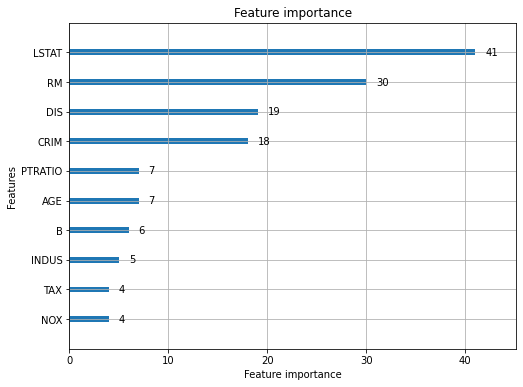

In [47]:
# plot the performance using lgb built-in graph 
lgb.plot_importance(booster, figsize=(8,6))

### plot_metric()

This method plots the results of an evaluation metric. We need to give a booster instance to the method in order to plot an evaluation metric evaluated on the evaluation dataset.

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)
[1]	Validation Set's rmse: 7.67235	Validation Set's l2: 58.865
[2]	Validation Set's rmse: 7.0352	Validation Set's l2: 49.4941
[3]	Validation Set's rmse: 6.47024	Validation Set's l2: 41.8641
[4]	Validation Set's rmse: 5.9505	Validation Set's l2: 35.4085
[5]	Validation Set's rmse: 5.50707	Validation Set's l2: 30.3278
[6]	Validation Set's rmse: 5.11613	Validation Set's l2: 26.1748
[7]	Validation Set's rmse: 4.78904	Validation Set's l2: 22.9349
[8]	Validation Set's rmse: 4.49257	Validation Set's l2: 20.1832
[9]	Validation Set's rmse: 4.26761	Validation Set's l2: 18.2125
[10]	Validation Set's rmse: 4.08201	Validation Set's l2: 16.6628


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

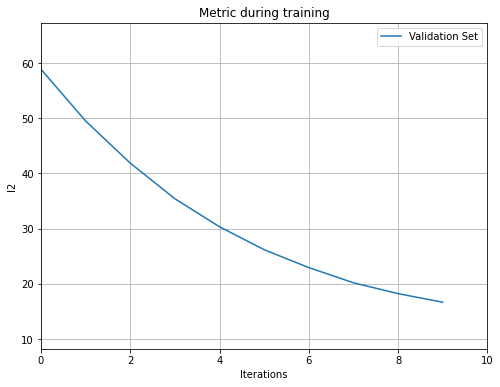

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="regression", n_estimators=10,)

booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),], eval_metric="rmse", eval_names = ["Validation Set"],
            feature_name=boston.feature_names.tolist())

# plot the metric using lgb built-in graph
lgb.plot_metric(booster, figsize=(8,6))

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='rmse'>

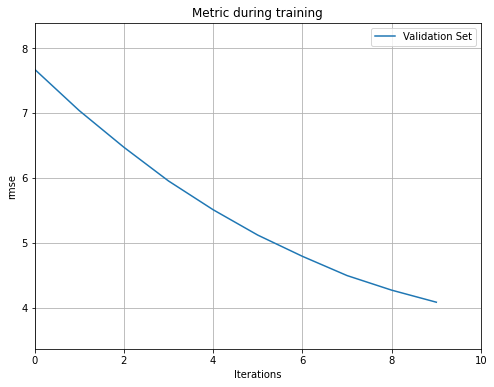

In [49]:
lgb.plot_metric(booster, metric="rmse", figsize=(8,6))

### plot_split_value_histogram()

This method takes as input booster instance and feature name/index. It then plots a split value histogram for the feature.

<AxesSubplot:title={'center':'Split value histogram for feature with name LSTAT'}, xlabel='Feature split value', ylabel='Count'>

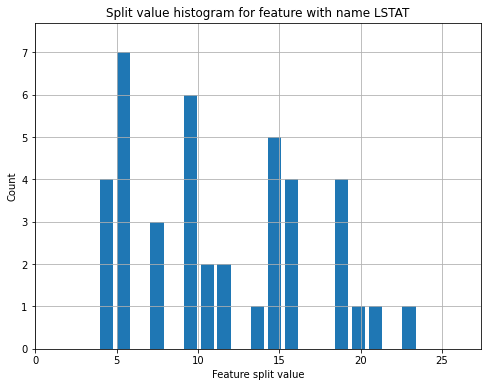

In [50]:
lgb.plot_split_value_histogram(booster, feature="LSTAT", figsize=(8,6))

### plot_tree()

This method lets us plot the individual tree of the ensemble. We need to give a booster instance and index of the tree which we want to plot to it.

<AxesSubplot:>

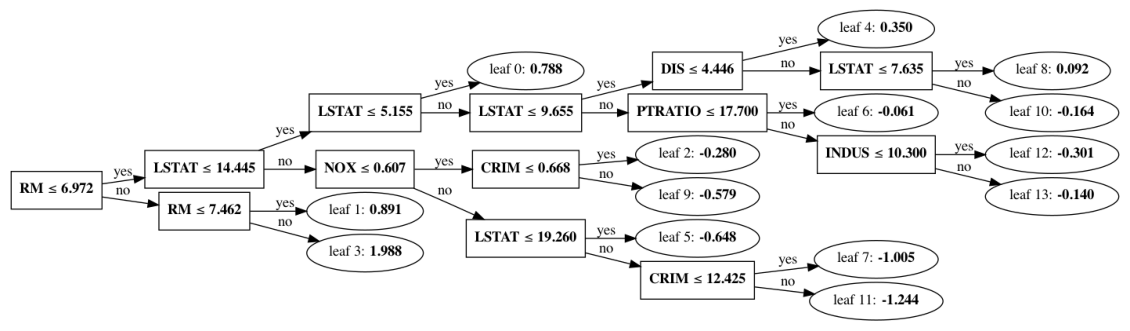

In [51]:
lgb.plot_tree(booster, tree_index = 1, figsize=(20,12))

## Early Stopping Training

Early stopping training is a process where we stop training if the evaluation metric evaluated on the evaluation dataset is not improving for a specified number of rounds. Lightgbm provides parameter named early_stopping_rounds as a part of train() method as well as fit() method of lightgbm sklearn-like estimators. This parameter accepts integer value specifying that stop the training process if the evaluation metric result has not improved for that many rounds.

Please make a note that we need an evaluation dataset in order for this to work as it’s based on evaluation metric results evaluated on the evaluation dataset.

Below we have explained the usage of the parameter early_stopping_rounds for regression and classification tasks with simple examples.

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

# early_stopping_rounds = 5
booster = lgb.train({"objective": "regression", "verbosity": -1, "metric": "rmse"},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    early_stopping_rounds=5,
                    num_boost_round=100)


from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 8.34842
Training until validation scores don't improve for 5 rounds
[2]	valid_0's rmse: 7.74892
[3]	valid_0's rmse: 7.21769
[4]	valid_0's rmse: 6.73637
[5]	valid_0's rmse: 6.31446
[6]	valid_0's rmse: 5.94183
[7]	valid_0's rmse: 5.61866
[8]	valid_0's rmse: 5.33416
[9]	valid_0's rmse: 5.07542
[10]	valid_0's rmse: 4.86871
[11]	valid_0's rmse: 4.66187
[12]	valid_0's rmse: 4.51139
[13]	valid_0's rmse: 4.35577
[14]	valid_0's rmse: 4.20796
[15]	valid_0's rmse: 4.10601
[16]	valid_0's rmse: 3.99954
[17]	valid_0's rmse: 3.90961
[18]	valid_0's rmse: 3.82026
[19]	valid_0's rmse: 3.76619
[20]	valid_0's rmse: 3.70553
[21]	valid_0's rmse: 3.64445
[22]	valid_0's rmse: 3.59078
[23]	valid_0's rmse: 3.54158
[24]	valid_0's rmse: 3.51947
[25]	valid_0's rmse: 3.50207
[26]	valid_0's rmse: 3.4655
[27]	valid_0's rmse: 3.4336
[28]	valid_0's rmse: 3.38799
[29]	valid_0's rmse: 3.3786
[30]	valid_0's rmse: 3.3328
[31]	valid_0's rmse: 3.30403


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="binary", n_estimators=100, metric="auc")

# early_stopping_rounds = 3
booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),],
            early_stopping_rounds=3)


from sklearn.metrics import accuracy_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("\nTest  Accuracy Score : %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy Score : %.2f"%accuracy_score(Y_train, train_preds))

Train/Test Sizes :  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's auc: 0.950262
Training until validation scores don't improve for 3 rounds
[2]	valid_0's auc: 0.95571
[3]	valid_0's auc: 0.955307
[4]	valid_0's auc: 0.963781
[5]	valid_0's auc: 0.966303
[6]	valid_0's auc: 0.972659
[7]	valid_0's auc: 0.972458
[8]	valid_0's auc: 0.971852
[9]	valid_0's auc: 0.974072
[10]	valid_0's auc: 0.975787
[11]	valid_0's auc: 0.979822
[12]	valid_0's auc: 0.981235
[13]	valid_0's auc: 0.983051
[14]	valid_0's auc: 0.982647
[15]	valid_0's auc: 0.981033
[16]	valid_0's auc: 0.981437
Early stopping, best iteration is:
[13]	valid_0's auc: 0.983051

Test  Accuracy Score : 0.94
Train Accuracy Score : 0.98


#### Lightgbm provides early stopping training functionality using the early_stopping() callback function as well. We can give number of rounds to early_stopping() function and give that function to callbacks parameter of train()/fit() method. We have explained callbacks in an upcoming section.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="binary", n_estimators=100, metric="auc")

# callbacks=[lgb.early_stopping(3)]
booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),],
            callbacks=[lgb.early_stopping(3)]
            )


from sklearn.metrics import accuracy_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("\nTest  Accuracy Score : %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy Score : %.2f"%accuracy_score(Y_train, train_preds))

Train/Test Sizes :  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's auc: 0.970246
Training until validation scores don't improve for 3 rounds
[2]	valid_0's auc: 0.974303
[3]	valid_0's auc: 0.974719
[4]	valid_0's auc: 0.974927
[5]	valid_0's auc: 0.966916
[6]	valid_0's auc: 0.966916
[7]	valid_0's auc: 0.967749
Early stopping, best iteration is:
[4]	valid_0's auc: 0.974927

Test  Accuracy Score : 0.92
Train Accuracy Score : 0.95


## Feature Interaction Constraints

When lightgbm has completed training trees of the ensemble on a dataset, the individual node of trees represents some condition based on some value of the feature. When we are making predictions using an individual tree, we start from the root node of the tree, checking the feature condition specified in the node with our sample feature values. We make decisions based on the feature values in our sample and the condition present in the tree. This way we follow a particular path reaching the leaf of the tree to make the final prediction. By default, there is no restriction on which node can have which feature as a condition. This process of making a final decision by going through nodes of tree checking feature condition is called feature interaction because predictor has come to the particular node after evaluating the condition of the previous node. Lightgbm can let us define restrictions on which feature to interact with which another feature. We can give a list of indices and only that many features will interact with one another. Those features won't be allowed to interact with other features and this restriction will be forced when creating trees during the training process.

Below we have explained with a simple example of how we can force feature interaction constraint on estimator in lightgbm. Lighgbm estimators provide a parameter named interaction_constraints which accepts a list of lists where individual lists are indices of parameters that are allowed to interact with one another.

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, train_size=0.90, random_state=42)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, "\n")

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

# 'interaction_constraints'
booster = lgb.train({"objective": "regression", "verbosity": -1, "metric": "rmse",
                    'interaction_constraints':[[0,1,2,11,12], [3, 4],[6,10], [5,9], [7,8]]},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)


from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

Train/Test Sizes :  (455, 13) (51, 13) (455,) (51,) 

[1]	valid_0's rmse: 7.50225
[2]	valid_0's rmse: 7.01989
[3]	valid_0's rmse: 6.58246
[4]	valid_0's rmse: 6.18581
[5]	valid_0's rmse: 5.83873
[6]	valid_0's rmse: 5.47166
[7]	valid_0's rmse: 5.19667
[8]	valid_0's rmse: 4.96259
[9]	valid_0's rmse: 4.69168
[10]	valid_0's rmse: 4.51653

Test  R2 Score : 0.67
Train R2 Score : 0.69


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# interaction_constraints
booster = lgb.LGBMModel(objective="regression", n_estimators=10,
                        interaction_constraints = [[0,1,2,11,12], [3, 4],[6,10], [5,9], [7,8]])

booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),], eval_metric="rmse",
            )

from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 8.39767	valid_0's l2: 70.5208
[2]	valid_0's rmse: 7.96609	valid_0's l2: 63.4587
[3]	valid_0's rmse: 7.4764	valid_0's l2: 55.8965
[4]	valid_0's rmse: 7.14941	valid_0's l2: 51.1141
[5]	valid_0's rmse: 6.77229	valid_0's l2: 45.8639
[6]	valid_0's rmse: 6.5229	valid_0's l2: 42.5483
[7]	valid_0's rmse: 6.32644	valid_0's l2: 40.0239
[8]	valid_0's rmse: 6.06744	valid_0's l2: 36.8138
[9]	valid_0's rmse: 5.9335	valid_0's l2: 35.2064
[10]	valid_0's rmse: 5.73785	valid_0's l2: 32.9229

Test  R2 Score : 0.58
Train R2 Score : 0.71


## Callbacks

Lightgbm provides users with a list of callback functions for a different purpose that gets executed after each iteration of training. Below is a list of available callback functions with lightgbm:

- early_stopping(stopping_rounds) - This callback function accepts an integer specifying whether to stop training if evaluation metric results on the last evaluation set are not improved for that many iterations.
- print_evaluation(period, show_stdv) - This callback function accepts integer values specifying how often to print evaluation results. Evaluation metric results are printed at every that many iterations as specified.
- record_evaluation(eval_result) - This callback function accepts a dictionary in which evaluation results will be recorded.
- reset_parameter() - This callback function lets us reset the learning rate after each iteration of training. It accepts an array of size the same as the number of iterations or callback returning the new learning rate for each iteration.

The callbacks parameter which is available with the train() method and the fit() method of estimators accepts a list of callback functions.

Below we have explained with simple examples of how we can use different callback functions. The explanation of the early_stopping() callback function has been covered in the early stopping training section of this tutorial.

In [59]:
def first_grad(predt, dmat):
    '''Compute the first derivative for mean squared error.'''
    y = dmat.get_label() if isinstance(dmat, lgb.Dataset) else dmat
    return 2*(y-predt)

def second_grad(predt, dmat):
    '''Compute the second derivative for mean squared error.'''
    y = dmat.get_label() if isinstance(dmat, lgb.Dataset) else dmat
    return [1] * len(predt)

def mean_sqaured_error(predt, dmat):
    ''''Mean squared error function.'''
    predt[predt < -1] = -1 + 1e-6
    grad = first_grad(predt, dmat)
    hess = second_grad(predt, dmat)
    return grad, hess

In [61]:
def mean_absolute_error(preds, dmat):
    actuals = dmat.get_label() if isinstance(dmat, lgb.Dataset) else dmat
    err = (actuals - preds).sum()
    is_higher_better = False
    return "MAE", err, is_higher_better

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective=mean_sqaured_error, n_estimators=10,)

# lgb.callback.print_evaluation
booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),], eval_metric="rmse", verbose=False,
            callbacks=[lgb.callback.print_evaluation(period=3)])

from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)
[3]	valid_0's rmse: 14.0513
[6]	valid_0's rmse: 9.11206
[9]	valid_0's rmse: 7.02225

Test  R2 Score : 0.47
Train R2 Score : 0.84


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective=mean_sqaured_error, n_estimators=10,)

# lgb.print_evaluation(period=3), lgb.record_evaluation(evals_results)
evals_results = {} # creat an empty dict

booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),], eval_metric="rmse", verbose=False,
            callbacks=[lgb.print_evaluation(period=3), lgb.record_evaluation(evals_results)])

from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))
print("Evaluation Results : ", evals_results)

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)
[3]	valid_0's rmse: 12.4224
[6]	valid_0's rmse: 6.86183
[9]	valid_0's rmse: 4.441

Test  R2 Score : 0.80
Train R2 Score : 0.80
Evaluation Results :  {'valid_0': OrderedDict([('rmse', [19.161300519739168, 15.373207569394955, 12.422387932970771, 10.111529270395359, 8.290175244988973, 6.861832654328351, 5.808810060073737, 5.013050820616607, 4.441003018373879, 4.054905874624719])])}


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective=mean_sqaured_error, n_estimators=10,)

# lgb.reset_parameter
booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),], eval_metric="rmse",
            callbacks=[lgb.reset_parameter(learning_rate=np.linspace(0.1,1,10).tolist())])

from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

Train/Test Sizes :  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 20.5495
[2]	valid_0's rmse: 12.9511
[3]	valid_0's rmse: 6.656
[4]	valid_0's rmse: 4.55017
[5]	valid_0's rmse: 4.18369
[6]	valid_0's rmse: 3.97251
[7]	valid_0's rmse: 4.00425
[8]	valid_0's rmse: 3.87624
[9]	valid_0's rmse: 3.963
[10]	valid_0's rmse: 3.75744

Test  R2 Score : 0.87
Train R2 Score : 0.94
